In [1]:
# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú
import warnings
warnings.filterwarnings("ignore")

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (MatplotlibÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")  # Windows ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams["axes.unicode_minus"] = False

# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np

# ÏãúÍ∞ÅÌôîÏö© ÏÉâÏÉÅ ÌåîÎ†àÌä∏
color_palette = sns.color_palette("Set2", as_cmap=False)

In [2]:
df = pl.read_csv('./dataset/CUSTOMER_SCORE_Í∏àÎ¶¨.csv')
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÍ≤∞Í≥º = pl.read_csv('./dataset/ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÍ≤∞Í≥º_Ï†ÑÏ≤¥_kmeans_db_6.csv')
customer_agg = pl.read_csv('./dataset/customer_agg.csv')

In [3]:
df

shape: (56_322_649, 14)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID  ‚îÜ Í∏∞Ï§ÄÎÖÑ  ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏÑ±Î≥Ñ ‚îÜ ‚Ä¶ ‚îÜ Í∏∞Ï§ÄÍ∏à  ‚îÜ Î≥¥Ïú†ÏÉÅ  ‚îÜ Í±∞ÎûòÍ∏∞  ‚îÜ Ï¥ùÏ†êÏàò ‚îÇ
‚îÇ ---     ‚îÜ Ïõî      ‚îÜ ---    ‚îÜ ---  ‚îÜ   ‚îÜ Î¶¨      ‚îÜ ÌíàÏàò    ‚îÜ Í∞Ñ(Í∞úÏõî ‚îÜ ---    ‚îÇ
‚îÇ i64     ‚îÜ ---     ‚îÜ i64    ‚îÜ str  ‚îÜ   ‚îÜ ---     ‚îÜ ---     ‚îÜ )       ‚îÜ f64    ‚îÇ
‚îÇ         ‚îÜ i64     ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ f64     ‚îÜ i64     ‚îÜ ---     ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ i64     ‚îÜ        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 9999998 ‚îÜ 202106  ‚îÜ 60     ‚îÜ Ïó¨   ‚îÜ ‚Ä¶ ‚îÜ 4.55    ‚îÜ 2       ‚îÜ 6       ‚îÜ 1040.5 ‚îÇ
‚îÇ 161     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 33333  ‚îÇ
‚îÇ 9999997 ‚îÜ 202106  ‚îÜ 60     ‚îÜ ÎÇ®   ‚îÜ ‚Ä¶ ‚îÜ 4.55    ‚îÜ 2       ‚îÜ 6       ‚îÜ 436.0  ‚îÇ
‚îÇ 589     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÇ
‚îÇ 9999991 ‚îÜ 202106  ‚îÜ 60     ‚îÜ Ïó¨   ‚îÜ ‚Ä¶ ‚îÜ 4.55    ‚îÜ 1       ‚îÜ 6       ‚îÜ 1210.0 ‚îÇ
‚îÇ 579     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÇ
‚îÇ 9999989 ‚îÜ 202106  ‚îÜ 60     ‚îÜ ÎÇ®   ‚îÜ ‚Ä¶ ‚îÜ 4.55    ‚îÜ 1       ‚îÜ 6       ‚îÜ 42.0   ‚îÇ
‚îÇ 448     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÇ
‚îÇ 9999988 ‚îÜ 202106  ‚îÜ 60     ‚îÜ ÎÇ®   ‚îÜ ‚Ä¶ ‚îÜ 4.55    ‚îÜ 1       ‚îÜ 6       ‚îÜ 178.0  ‚îÇ
‚îÇ 325     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ 2000384 ‚îÜ 202312  ‚îÜ 60     ‚îÜ ÎÇ®   ‚îÜ ‚Ä¶ ‚îÜ 9.18    ‚îÜ 1       ‚îÜ 1       ‚îÜ 17.991 ‚îÇ
‚îÇ 629     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 667    ‚îÇ
‚îÇ 2000380 ‚îÜ 202312  ‚îÜ 30     ‚îÜ ÎÇ®   ‚îÜ ‚Ä¶ ‚îÜ 9.18    ‚îÜ 1       ‚îÜ 1       ‚îÜ 17.991 ‚îÇ
‚îÇ 811     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 667    ‚îÇ
‚îÇ 2000379 ‚îÜ 202312  ‚îÜ 20     ‚îÜ Ïó¨   ‚îÜ ‚Ä¶ ‚îÜ 9.18    ‚îÜ 1       ‚îÜ 1       ‚îÜ 17.991 ‚îÇ
‚îÇ 801     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 667    ‚îÇ
‚îÇ 2000379 ‚îÜ 202312  ‚îÜ 50     ‚îÜ Ïó¨   ‚îÜ ‚Ä¶ ‚îÜ 9.18    ‚îÜ 2       ‚îÜ 1       ‚îÜ 30.658 ‚îÇ
‚îÇ 244     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 333    ‚îÇ
‚îÇ 2000369 ‚îÜ 202312  ‚îÜ 20     ‚îÜ Ïó¨   ‚îÜ ‚Ä¶ ‚îÜ 9.18    ‚îÜ 1       ‚îÜ 1       ‚îÜ 17.991 ‚îÇ
‚îÇ 205     ‚îÜ         ‚îÜ        ‚îÜ      ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ 667    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [5]:
customer_agg

shape: (1_978_693, 11)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_Í∏∞ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ Í±∞ÎûòÍ∏∞ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ ÌèâÍ∑†_  ‚îÇ
‚îÇ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ ÌÉÄÏòàÍ∏à  ‚îÜ ÎπÑÏù¥Ïûê ‚îÜ   ‚îÜ Í∞Ñ(Í∞ú  ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÇ
‚îÇ i64     ‚îÜ Í∏à      ‚îÜ ---     ‚îÜ ÏÉÅÌíà   ‚îÜ   ‚îÜ Ïõî)    ‚îÜ i64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÇ
‚îÇ         ‚îÜ ---     ‚îÜ f64     ‚îÜ ---    ‚îÜ   ‚îÜ ---    ‚îÜ        ‚îÜ ---    ‚îÜ ---    ‚îÇ
‚îÇ         ‚îÜ f64     ‚îÜ         ‚îÜ f64    ‚îÜ   ‚îÜ i64    ‚îÜ        ‚îÜ i64    ‚îÜ i64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3527493 ‚îÜ 35483.8 ‚îÜ 6451.61 ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 30     ‚îÜ 2      ‚îÜ 0      ‚îÇ
‚îÇ 725     ‚îÜ 70968   ‚îÜ 2903    ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5825588 ‚îÜ 380645. ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 20     ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 873     ‚îÜ 16129   ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7628291 ‚îÜ 1.5774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 40     ‚îÜ 2      ‚îÜ 2      ‚îÇ
‚îÇ 031     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 2746476 ‚îÜ 1.0579e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 22     ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 445     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7089451 ‚îÜ 1.0935e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 750     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ 7677297 ‚îÜ 1.6774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 50     ‚îÜ 2      ‚îÜ 2      ‚îÇ
‚îÇ 181     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 8483897 ‚îÜ 8.1516e ‚îÜ 1.1065e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 60     ‚îÜ 4      ‚îÜ 3      ‚îÇ
‚îÇ 090     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7090476 ‚îÜ 6.4903e ‚îÜ 1.4377e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 40     ‚îÜ 4      ‚îÜ 4      ‚îÇ
‚îÇ 892     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 6148316 ‚îÜ 1.9355e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 30     ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 247     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 3541722 ‚îÜ 0.0     ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 36     ‚îÜ 30     ‚îÜ 1      ‚îÜ 0      ‚îÇ
‚îÇ 942     ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [6]:
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÍ≤∞Í≥º

shape: (1_978_693, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID  ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_Í∏∞ ‚îÜ ‚Ä¶ ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ KMeans ‚îÇ
‚îÇ ---     ‚îÜ ---    ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ ÌÉÄÏòàÍ∏à  ‚îÜ   ‚îÜ Ïπ¥Îìú   ‚îÜ ÎåÄÏ∂ú   ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ _DB_Í±∞ ‚îÇ
‚îÇ i64     ‚îÜ i64    ‚îÜ Í∏à      ‚îÜ ---     ‚îÜ   ‚îÜ ---    ‚îÜ ---    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ Î¶¨Í∏∞Î∞ò ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ ---     ‚îÜ f64     ‚îÜ   ‚îÜ f64    ‚îÜ f64    ‚îÜ ---    ‚îÜ ---    ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ f64     ‚îÜ         ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ i64    ‚îÜ i64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3527493 ‚îÜ 30     ‚îÜ 35483.8 ‚îÜ 6451.61 ‚îÜ ‚Ä¶ ‚îÜ 0.0    ‚îÜ 0.0    ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 725     ‚îÜ        ‚îÜ 70968   ‚îÜ 2903    ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5825588 ‚îÜ 20     ‚îÜ 380645. ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 53548. ‚îÜ 0.0    ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 873     ‚îÜ        ‚îÜ 16129   ‚îÜ         ‚îÜ   ‚îÜ 387097 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7628291 ‚îÜ 40     ‚îÜ 1.5774e ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 2.0223 ‚îÜ 0.0    ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 031     ‚îÜ        ‚îÜ 6       ‚îÜ         ‚îÜ   ‚îÜ e6     ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 2746476 ‚îÜ 40     ‚îÜ 1.0579e ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 0.0    ‚îÜ 447368 ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 445     ‚îÜ        ‚îÜ 6       ‚îÜ         ‚îÜ   ‚îÜ        ‚îÜ .42105 ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ        ‚îÜ 3      ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7089451 ‚îÜ 40     ‚îÜ 1.0935e ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 117096 ‚îÜ 0.0    ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 750     ‚îÜ        ‚îÜ 6       ‚îÜ         ‚îÜ   ‚îÜ .77419 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ 4      ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ 7677297 ‚îÜ 50     ‚îÜ 1.6774e ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 308709 ‚îÜ 0.0    ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 181     ‚îÜ        ‚îÜ 6       ‚îÜ         ‚îÜ   ‚îÜ .67741 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ 9      ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 8483897 ‚îÜ 60     ‚îÜ 8.1516e ‚îÜ 1.1065e ‚îÜ ‚Ä¶ ‚îÜ 72258. ‚îÜ 0.0    ‚îÜ 3      ‚îÜ 4      ‚îÇ
‚îÇ 090     ‚îÜ        ‚îÜ 6       ‚îÜ 7       ‚îÜ   ‚îÜ 064516 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7090476 ‚îÜ 40     ‚îÜ 6.4903e ‚îÜ 1.4377e ‚îÜ ‚Ä¶ ‚îÜ 388709 ‚îÜ 0.0    ‚îÜ 4      ‚îÜ 0      ‚îÇ
‚îÇ 892     ‚îÜ        ‚îÜ 6       ‚îÜ 7       ‚îÜ   ‚îÜ .67741 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ        ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ 9      ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 6148316 ‚îÜ 30     ‚îÜ 1.9355e ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 95161. ‚îÜ 0.0    ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 247     ‚îÜ        ‚îÜ 6       ‚îÜ         ‚îÜ   ‚îÜ 290323 ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 3541722 ‚îÜ 30     ‚îÜ 0.0     ‚îÜ 0.0     ‚îÜ ‚Ä¶ ‚îÜ 0.0    ‚îÜ 16129. ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 942     ‚îÜ        ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ        ‚îÜ 032258 ‚îÜ        ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [7]:
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÍ≤∞Í≥º['KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò'].value_counts()

shape: (6, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò ‚îÜ count   ‚îÇ
‚îÇ ---                ‚îÜ ---     ‚îÇ
‚îÇ i64                ‚îÜ u32     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3                  ‚îÜ 31433   ‚îÇ
‚îÇ 0                  ‚îÜ 82990   ‚îÇ
‚îÇ 1                  ‚îÜ 1619255 ‚îÇ
‚îÇ 2                  ‚îÜ 61942   ‚îÇ
‚îÇ 5                  ‚îÜ 26586   ‚îÇ
‚îÇ 4                  ‚îÜ 156487  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [12]:
target = ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÍ≤∞Í≥º[['Í≥†Í∞ùID', 'KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò']]

In [13]:
target

shape: (1_978_693, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID     ‚îÜ KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò ‚îÇ
‚îÇ ---        ‚îÜ ---                ‚îÇ
‚îÇ i64        ‚îÜ i64                ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3527493725 ‚îÜ 1                  ‚îÇ
‚îÇ 5825588873 ‚îÜ 1                  ‚îÇ
‚îÇ 7628291031 ‚îÜ 1                  ‚îÇ
‚îÇ 2746476445 ‚îÜ 1                  ‚îÇ
‚îÇ 7089451750 ‚îÜ 1                  ‚îÇ
‚îÇ ‚Ä¶          ‚îÜ ‚Ä¶                  ‚îÇ
‚îÇ 7677297181 ‚îÜ 1                  ‚îÇ
‚îÇ 8483897090 ‚îÜ 4                  ‚îÇ
‚îÇ 7090476892 ‚îÜ 0                  ‚îÇ
‚îÇ 6148316247 ‚îÜ 1                  ‚îÇ
‚îÇ 3541722942 ‚îÜ 1                  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [14]:
# Í≥†Í∞ùID Í∏∞Ï§Ä left join
# left join: customer_aggÎ•º Í∏∞Ï§ÄÏúºÎ°ú targetÏùÑ Î≥ëÌï©
customer_agg_kmeans_db_Í±∞Î¶¨_6 = customer_agg.join(
    target, on="Í≥†Í∞ùID", how="left"
)

In [15]:
customer_agg_kmeans_db_Í±∞Î¶¨_6

shape: (1_978_693, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_Í∏∞ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ ÌèâÍ∑†_  ‚îÜ KMeans ‚îÇ
‚îÇ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ ÌÉÄÏòàÍ∏à  ‚îÜ ÎπÑÏù¥Ïûê ‚îÜ   ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ _DB_Í±∞ ‚îÇ
‚îÇ i64     ‚îÜ Í∏à      ‚îÜ ---     ‚îÜ ÏÉÅÌíà   ‚îÜ   ‚îÜ i64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ Î¶¨Í∏∞Î∞ò ‚îÇ
‚îÇ         ‚îÜ ---     ‚îÜ f64     ‚îÜ ---    ‚îÜ   ‚îÜ        ‚îÜ ---    ‚îÜ ---    ‚îÜ ---    ‚îÇ
‚îÇ         ‚îÜ f64     ‚îÜ         ‚îÜ f64    ‚îÜ   ‚îÜ        ‚îÜ i64    ‚îÜ i64    ‚îÜ i64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3527493 ‚îÜ 35483.8 ‚îÜ 6451.61 ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 2      ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 725     ‚îÜ 70968   ‚îÜ 2903    ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5825588 ‚îÜ 380645. ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 20     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 873     ‚îÜ 16129   ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7628291 ‚îÜ 1.5774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 031     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 2746476 ‚îÜ 1.0579e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 445     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7089451 ‚îÜ 1.0935e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 750     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ 7677297 ‚îÜ 1.6774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 50     ‚îÜ 2      ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 181     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 8483897 ‚îÜ 8.1516e ‚îÜ 1.1065e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 60     ‚îÜ 4      ‚îÜ 3      ‚îÜ 4      ‚îÇ
‚îÇ 090     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7090476 ‚îÜ 6.4903e ‚îÜ 1.4377e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 4      ‚îÜ 4      ‚îÜ 0      ‚îÇ
‚îÇ 892     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 6148316 ‚îÜ 1.9355e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 247     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 3541722 ‚îÜ 0.0     ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 1      ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 942     ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [19]:
customer_agg_kmeans_db_Í±∞Î¶¨_6.write_csv('./dataset/customer_agg_kmeans_db_Í±∞Î¶¨_6.csv')

In [16]:
customer_agg_kmeans_db_Í±∞Î¶¨_6.describe()

shape: (9, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statist ‚îÜ Í≥†Í∞ùID  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ ÌèâÍ∑†_  ‚îÜ KMeans ‚îÇ
‚îÇ ic      ‚îÜ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ Í∏∞ÌÉÄÏòà ‚îÜ   ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ _DB_Í±∞ ‚îÇ
‚îÇ ---     ‚îÜ f64     ‚îÜ Í∏à      ‚îÜ Í∏à     ‚îÜ   ‚îÜ f64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ Î¶¨Í∏∞Î∞ò ‚îÇ
‚îÇ str     ‚îÜ         ‚îÜ ---     ‚îÜ ---    ‚îÜ   ‚îÜ        ‚îÜ ---    ‚îÜ ---    ‚îÜ ---    ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ f64     ‚îÜ f64    ‚îÜ   ‚îÜ        ‚îÜ f64    ‚îÜ f64    ‚îÜ f64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count   ‚îÜ 1.97869 ‚îÜ 1.97869 ‚îÜ 1.9786 ‚îÜ ‚Ä¶ ‚îÜ 1.9786 ‚îÜ 1.9786 ‚îÜ 1.9786 ‚îÜ 1.9786 ‚îÇ
‚îÇ         ‚îÜ 3e6     ‚îÜ 3e6     ‚îÜ 93e6   ‚îÜ   ‚îÜ 93e6   ‚îÜ 93e6   ‚îÜ 93e6   ‚îÜ 93e6   ‚îÇ
‚îÇ null_co ‚îÜ 0.0     ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 0.0    ‚îÜ 0.0    ‚îÜ 0.0    ‚îÜ 0.0    ‚îÇ
‚îÇ unt     ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ mean    ‚îÜ 5.9962e ‚îÜ 3.0709e ‚îÜ 2.6716 ‚îÜ ‚Ä¶ ‚îÜ 41.132 ‚îÜ 1.9524 ‚îÜ 1.3991 ‚îÜ 1.3121 ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ 6       ‚îÜ e6     ‚îÜ   ‚îÜ 475    ‚îÜ 24     ‚îÜ 18     ‚îÜ 37     ‚îÇ
‚îÇ std     ‚îÜ 2.3083e ‚îÜ 6.9741e ‚îÜ 9.1386 ‚îÜ ‚Ä¶ ‚îÜ 15.895 ‚îÜ 1.0136 ‚îÜ 0.9867 ‚îÜ 0.9829 ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ 6       ‚îÜ e6     ‚îÜ   ‚îÜ 499    ‚îÜ 77     ‚îÜ 94     ‚îÜ 1      ‚îÇ
‚îÇ min     ‚îÜ 2.0004e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 10.0   ‚îÜ 0.0    ‚îÜ 0.0    ‚îÜ 0.0    ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 25%     ‚îÜ 4.0012e ‚îÜ 68750.0 ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30.0   ‚îÜ 1.0    ‚îÜ 1.0    ‚îÜ 1.0    ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 50%     ‚îÜ 5.9888e ‚îÜ 535483. ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40.0   ‚îÜ 2.0    ‚îÜ 1.0    ‚îÜ 1.0    ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ 870968  ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 75%     ‚îÜ 7.9953e ‚îÜ 2.8290e ‚îÜ 441935 ‚îÜ ‚Ä¶ ‚îÜ 60.0   ‚îÜ 3.0    ‚îÜ 2.0    ‚îÜ 1.0    ‚îÇ
‚îÇ         ‚îÜ 9       ‚îÜ 6       ‚îÜ .48387 ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ         ‚îÜ 1      ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ max     ‚îÜ 1.0000e ‚îÜ 1.855e8 ‚îÜ 1.84e8 ‚îÜ ‚Ä¶ ‚îÜ 60.0   ‚îÜ 7.0    ‚îÜ 7.0    ‚îÜ 5.0    ‚îÇ
‚îÇ         ‚îÜ 10      ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [22]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏïΩ ÌÜµÍ≥Ñ
summary_customer_agg_kmeans_db_Í±∞Î¶¨_6 = customer_agg_kmeans_db_Í±∞Î¶¨_6.group_by("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò").agg([
    pl.count().alias("Í≥†Í∞ùÏàò"),
    pl.col("ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à").mean().alias("ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à"),
    pl.col("ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à").mean().alias("ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à"),
    pl.col("ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà").mean().alias("ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà"),
    pl.col("ÌèâÍ∑†_Ïπ¥Îìú").mean().alias("ÌèâÍ∑†_Ïπ¥Îìú"),
    pl.col("ÌèâÍ∑†_ÎåÄÏ∂ú").mean().alias("ÌèâÍ∑†_ÎåÄÏ∂ú"),
    pl.col("ÌèâÍ∑†_Ï¥ùÏ†êÏàò").mean().alias("ÌèâÍ∑†_Ï¥ùÏ†êÏàò"),
    pl.col("ÌèâÍ∑†_Ï¥ùÏ†êÏàò").median().alias("Ï§ëÏïôÍ∞í_Ï¥ùÏ†êÏàò"),
    pl.col("Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)").mean().alias("ÌèâÍ∑†_Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)"),
    pl.col("Ïó∞Î†πÎåÄ").mean().alias("ÌèâÍ∑†_Ïó∞Î†πÎåÄ"),
    pl.col("ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò").mean().alias("ÌèâÍ∑†_ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"),
    pl.col("ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò").mean().round(0).cast(pl.Int8).alias("ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò")
    
])

In [23]:
summary_customer_agg_kmeans_db_Í±∞Î¶¨_6

shape: (6, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ KMeans_ ‚îÜ Í≥†Í∞ùÏàò  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÇ
‚îÇ DB_Í±∞Î¶¨ ‚îÜ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ Í∏∞ÌÉÄÏòà ‚îÜ   ‚îÜ Í±∞ÎûòÍ∏∞ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÇ
‚îÇ Í∏∞Î∞ò    ‚îÜ u32     ‚îÜ Í∏à      ‚îÜ Í∏à     ‚îÜ   ‚îÜ Í∞Ñ(Í∞ú  ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÇ
‚îÇ ---     ‚îÜ         ‚îÜ ---     ‚îÜ ---    ‚îÜ   ‚îÜ Ïõî)    ‚îÜ f64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ---    ‚îÇ
‚îÇ i64     ‚îÜ         ‚îÜ f64     ‚îÜ f64    ‚îÜ   ‚îÜ ---    ‚îÜ        ‚îÜ ---    ‚îÜ i8     ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ f64    ‚îÜ        ‚îÜ f64    ‚îÜ        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 82990   ‚îÜ 5.8479e ‚îÜ 2.2986 ‚îÜ ‚Ä¶ ‚îÜ 34.720 ‚îÜ 49.140 ‚îÜ 3.3078 ‚îÜ 3      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ e7     ‚îÜ   ‚îÜ 376    ‚îÜ 499    ‚îÜ 44     ‚îÜ        ‚îÇ
‚îÇ 3       ‚îÜ 31433   ‚îÜ 1.0382e ‚îÜ 5.8699 ‚îÜ ‚Ä¶ ‚îÜ 31.583 ‚îÜ 52.062 ‚îÜ 3.4364 ‚îÜ 3      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e7     ‚îÜ   ‚îÜ 59     ‚îÜ 8      ‚îÜ 84     ‚îÜ        ‚îÇ
‚îÇ 4       ‚îÜ 156487  ‚îÜ 1.3376e ‚îÜ 2.0630 ‚îÜ ‚Ä¶ ‚îÜ 35.232 ‚îÜ 48.628 ‚îÜ 2.4167 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e6     ‚îÜ   ‚îÜ 991    ‚îÜ 896    ‚îÜ 31     ‚îÜ        ‚îÇ
‚îÇ 1       ‚îÜ 1619255 ‚îÜ 1.0732e ‚îÜ 588032 ‚îÜ ‚Ä¶ ‚îÜ 32.736 ‚îÜ 39.509 ‚îÜ 1.7659 ‚îÜ 1      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ .93036 ‚îÜ   ‚îÜ 063    ‚îÜ 583    ‚îÜ 68     ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ         ‚îÜ 4      ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5       ‚îÜ 26586   ‚îÜ 4.4347e ‚îÜ 6.3876 ‚îÜ ‚Ä¶ ‚îÜ 33.028 ‚îÜ 49.156 ‚îÜ 2.6568 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e6     ‚îÜ   ‚îÜ 06     ‚îÜ 699    ‚îÜ 12     ‚îÜ        ‚îÇ
‚îÇ 2       ‚îÜ 61942   ‚îÜ 4.1143e ‚îÜ 1.4318 ‚îÜ ‚Ä¶ ‚îÜ 27.044 ‚îÜ 44.898 ‚îÜ 2.7822 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ e6     ‚îÜ   ‚îÜ 8      ‚îÜ 776    ‚îÜ 32     ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

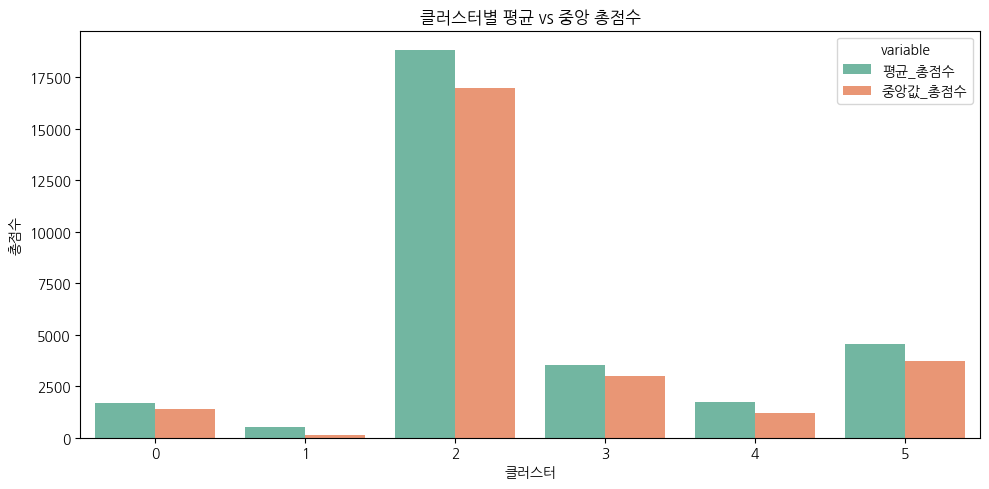

In [24]:
# Pandas Î≥ÄÌôò
summary_pd = summary_customer_agg_kmeans_db_Í±∞Î¶¨_6.sort("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò").to_pandas()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=summary_pd.melt(id_vars="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", value_vars=["ÌèâÍ∑†_Ï¥ùÏ†êÏàò", "Ï§ëÏïôÍ∞í_Ï¥ùÏ†êÏàò"]),
    x="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", y="value", hue="variable", palette="Set2"
)
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† vs Ï§ëÏïô Ï¥ùÏ†êÏàò")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("Ï¥ùÏ†êÏàò")
plt.tight_layout()
plt.show()

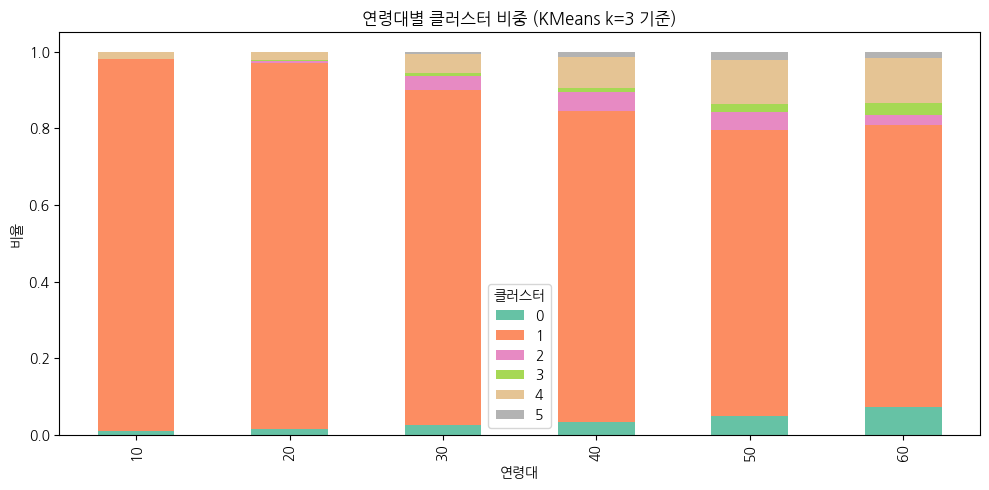

In [27]:
# Í∑∏Î£πÎ≥Ñ count Í≥ÑÏÇ∞ ÌõÑ pivot
age_cluster = customer_agg_kmeans_db_Í±∞Î¶¨_6.group_by(["Ïó∞Î†πÎåÄ", "KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò"]).count().to_pandas()
pivot = age_cluster.pivot(index="Ïó∞Î†πÎåÄ", columns="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", values="count").fillna(0)

# ÎπÑÏú®Î°ú Î≥ÄÌôò
pivot_ratio = pivot.div(pivot.sum(axis=1), axis=0)

# ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ
pivot_ratio.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="Set2")
plt.title("Ïó∞Î†πÎåÄÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎπÑÏ§ë (KMeans k=3 Í∏∞Ï§Ä)")
plt.ylabel("ÎπÑÏú®")
plt.xlabel("Ïó∞Î†πÎåÄ")
plt.legend(title="ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.tight_layout()
plt.show()

In [28]:
pivot_ratio

KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò         0         1         2         3         4         5
Ïó∞Î†πÎåÄ                                                                       
10              0.010006  0.969630  0.000018  0.000360  0.019194  0.000792
20              0.016096  0.952814  0.007369  0.002025  0.019841  0.001854
30              0.025369  0.873991  0.036935  0.006775  0.049148  0.007781
40              0.033812  0.811899  0.047990  0.012035  0.079089  0.015174
50              0.049298  0.746064  0.046643  0.020459  0.115147  0.022390
60              0.072268  0.736590  0.026177  0.031167  0.115616  0.018181

In [30]:
summary_customer_agg_kmeans_db_Í±∞Î¶¨_6

shape: (6, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ KMeans_ ‚îÜ Í≥†Í∞ùÏàò  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÜ ÌèâÍ∑†_  ‚îÇ
‚îÇ DB_Í±∞Î¶¨ ‚îÜ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ Í∏∞ÌÉÄÏòà ‚îÜ   ‚îÜ Í±∞ÎûòÍ∏∞ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÇ
‚îÇ Í∏∞Î∞ò    ‚îÜ u32     ‚îÜ Í∏à      ‚îÜ Í∏à     ‚îÜ   ‚îÜ Í∞Ñ(Í∞ú  ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÇ
‚îÇ ---     ‚îÜ         ‚îÜ ---     ‚îÜ ---    ‚îÜ   ‚îÜ Ïõî)    ‚îÜ f64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ---    ‚îÇ
‚îÇ i64     ‚îÜ         ‚îÜ f64     ‚îÜ f64    ‚îÜ   ‚îÜ ---    ‚îÜ        ‚îÜ ---    ‚îÜ i8     ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ f64    ‚îÜ        ‚îÜ f64    ‚îÜ        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 82990   ‚îÜ 5.8479e ‚îÜ 2.2986 ‚îÜ ‚Ä¶ ‚îÜ 34.720 ‚îÜ 49.140 ‚îÜ 3.3078 ‚îÜ 3      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ e7     ‚îÜ   ‚îÜ 376    ‚îÜ 499    ‚îÜ 44     ‚îÜ        ‚îÇ
‚îÇ 3       ‚îÜ 31433   ‚îÜ 1.0382e ‚îÜ 5.8699 ‚îÜ ‚Ä¶ ‚îÜ 31.583 ‚îÜ 52.062 ‚îÜ 3.4364 ‚îÜ 3      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e7     ‚îÜ   ‚îÜ 59     ‚îÜ 8      ‚îÜ 84     ‚îÜ        ‚îÇ
‚îÇ 4       ‚îÜ 156487  ‚îÜ 1.3376e ‚îÜ 2.0630 ‚îÜ ‚Ä¶ ‚îÜ 35.232 ‚îÜ 48.628 ‚îÜ 2.4167 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e6     ‚îÜ   ‚îÜ 991    ‚îÜ 896    ‚îÜ 31     ‚îÜ        ‚îÇ
‚îÇ 1       ‚îÜ 1619255 ‚îÜ 1.0732e ‚îÜ 588032 ‚îÜ ‚Ä¶ ‚îÜ 32.736 ‚îÜ 39.509 ‚îÜ 1.7659 ‚îÜ 1      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ .93036 ‚îÜ   ‚îÜ 063    ‚îÜ 583    ‚îÜ 68     ‚îÜ        ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ         ‚îÜ 4      ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5       ‚îÜ 26586   ‚îÜ 4.4347e ‚îÜ 6.3876 ‚îÜ ‚Ä¶ ‚îÜ 33.028 ‚îÜ 49.156 ‚îÜ 2.6568 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 7       ‚îÜ e6     ‚îÜ   ‚îÜ 06     ‚îÜ 699    ‚îÜ 12     ‚îÜ        ‚îÇ
‚îÇ 2       ‚îÜ 61942   ‚îÜ 4.1143e ‚îÜ 1.4318 ‚îÜ ‚Ä¶ ‚îÜ 27.044 ‚îÜ 44.898 ‚îÜ 2.7822 ‚îÜ 2      ‚îÇ
‚îÇ         ‚îÜ         ‚îÜ 6       ‚îÜ e6     ‚îÜ   ‚îÜ 8      ‚îÜ 776    ‚îÜ 32     ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [34]:
# 2. Ï∂©ÏÑ±ÎèÑ, ÏÉÅÌíà ÌòïÌÉú Î∂ÑÎ•ò Ìï®Ïàò Ï†ïÏùò
def classify(row):
    loyalty = (
        "Ï∂©ÏÑ±ÎèÑ ÎÇÆÏùå" if row["ÌèâÍ∑†_Ï¥ùÏ†êÏàò"] < 600 else
        "Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ" if row["ÌèâÍ∑†_Ï¥ùÏ†êÏàò"] < 10000 else
        "Ï∂©ÏÑ±ÎèÑ ÎÜíÏùå"
    )
    product = (
        "Îã®Ïùº ÏÉÅÌíà Î≥¥Ïú†" if row["ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"] < 2 else
        "Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú†" if row["ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"] < 3  else
        "ÏÉÅÌíà Îã§Ïàò Î≥¥Ïú†"
    )
    return loyalty, product

# 3. Pandas Î≥ÄÌôò ÌõÑ Ï†ÑÎûµ Î¨∏Ïû• ÏÉùÏÑ±
df_pd = summary_customer_agg_kmeans_db_Í±∞Î¶¨_6.to_pandas()
df_pd["Ï∂©ÏÑ±ÎèÑ ÏàòÏ§Ä"], df_pd["ÏÉÅÌíà Î≥¥Ïú† ÌòïÌÉú"] = zip(*df_pd.apply(classify, axis=1))
df_pd["Ï∂îÏ≤ú Ï†ÑÎûµ"] = df_pd.apply(
    lambda row: f"{row['Ï∂©ÏÑ±ÎèÑ ÏàòÏ§Ä']} & {row['ÏÉÅÌíà Î≥¥Ïú† ÌòïÌÉú']} Í≥†Í∞ùÍµ∞ÏúºÎ°ú, "
                f"{'ÎùΩÏù∏ Ï†ÑÎûµ Í∞ïÌôî ÌïÑÏöî' if 'ÎÇÆÏùå' in row['Ï∂©ÏÑ±ÎèÑ ÏàòÏ§Ä'] else 'ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú'}",
    axis=1
)

# 4. PPTÏö© Ìëú Íµ¨ÏÑ±
ppt_table = df_pd[[
    "KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò","ÌèâÍ∑†_Ïó∞Î†πÎåÄ", "Í≥†Í∞ùÏàò", "ÌèâÍ∑†_Ï¥ùÏ†êÏàò", "ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò",
    "Ï∂©ÏÑ±ÎèÑ ÏàòÏ§Ä", "ÏÉÅÌíà Î≥¥Ïú† ÌòïÌÉú", "Ï∂îÏ≤ú Ï†ÑÎûµ"
]]


In [35]:
ppt_table

KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò     ÌèâÍ∑†_Ïó∞Î†πÎåÄ      Í≥†Í∞ùÏàò        ÌèâÍ∑†_Ï¥ùÏ†êÏàò  ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò  Ï∂©ÏÑ±ÎèÑ ÏàòÏ§Ä  \
0               0  49.140499    82990   1681.659073          3  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ   
1               3  52.062800    31433   3508.670226          3  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ   
2               4  48.628896   156487   1710.025562          2  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ   
3               1  39.509583  1619255    519.497843          1  Ï∂©ÏÑ±ÎèÑ ÎÇÆÏùå   
4               5  49.156699    26586   4535.875768          2  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ   
5               2  44.898776    61942  18817.005384          2  Ï∂©ÏÑ±ÎèÑ ÎÜíÏùå   

   ÏÉÅÌíà Î≥¥Ïú† ÌòïÌÉú                                    Ï∂îÏ≤ú Ï†ÑÎûµ  
0  ÏÉÅÌíà Îã§Ïàò Î≥¥Ïú†  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ & ÏÉÅÌíà Îã§Ïàò Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú  
1  ÏÉÅÌíà Îã§Ïàò Î≥¥Ïú†  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ & ÏÉÅÌíà Îã§Ïàò Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú  
2  Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú†  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ & Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú  
3  Îã®Ïùº ÏÉÅÌíà Î≥¥Ïú†     Ï∂©ÏÑ±ÎèÑ ÎÇÆÏùå & Îã®Ïùº ÏÉÅÌíà Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÎùΩÏù∏ Ï†ÑÎûµ Í∞ïÌôî ÌïÑÏöî  
4  Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú†  Ï∂©ÏÑ±ÎèÑ Ï§ëÍ∞Ñ & Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú  
5  Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú†  Ï∂©ÏÑ±ÎèÑ ÎÜíÏùå & Î≥µÏàò ÏÉÅÌíà Î≥¥Ïú† Í≥†Í∞ùÍµ∞ÏúºÎ°ú, ÌòúÌÉù Í∏∞Î∞ò Ïú†ÏßÄ Ï†ÑÎûµ Ï∂îÏ≤ú

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïûò ÎÇòÎâòÏóàÎäî ÏßÄ ÏöîÏÜå ÌôïÏù∏

## ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù Ïàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ

In [38]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ïûò ÎÇòÎâòÏñ¥Ï°åÎäî ÏßÄ ÌôïÏù∏Ìï¥Î¥êÏïºÌï®!!

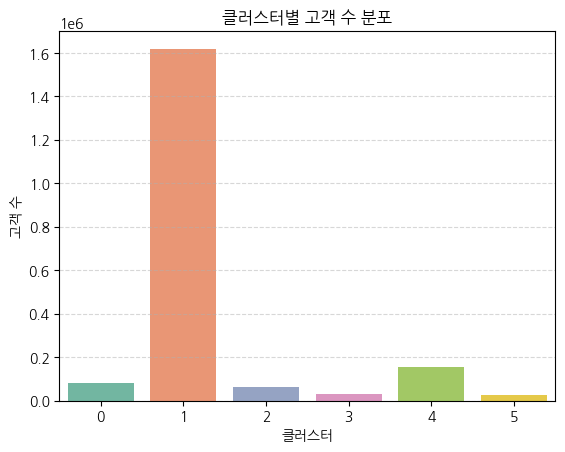

In [37]:
# Ï†ÑÏ≤¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨ Î∞è ÌäπÏÑ± Ï∞®Ïù¥ ÌôïÏù∏
sns.countplot(data=customer_agg_kmeans_db_Í±∞Î¶¨_6.to_pandas(), x="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", palette="Set2")
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù Ïàò Î∂ÑÌè¨")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [39]:
customer_agg_kmeans_db_Í±∞Î¶¨_6

shape: (1_978_693, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥†Í∞ùID  ‚îÜ ÌèâÍ∑†_ÏûÖ ‚îÜ ÌèâÍ∑†_Í∏∞ ‚îÜ ÌèâÍ∑†_  ‚îÜ ‚Ä¶ ‚îÜ Ïó∞Î†πÎåÄ ‚îÜ ÏµúÎåÄ_  ‚îÜ ÌèâÍ∑†_  ‚îÜ KMeans ‚îÇ
‚îÇ ---     ‚îÜ Ï∂úÍ∏àÏòà  ‚îÜ ÌÉÄÏòàÍ∏à  ‚îÜ ÎπÑÏù¥Ïûê ‚îÜ   ‚îÜ ---    ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ Î≥¥Ïú†ÏÉÅ ‚îÜ _DB_Í±∞ ‚îÇ
‚îÇ i64     ‚îÜ Í∏à      ‚îÜ ---     ‚îÜ ÏÉÅÌíà   ‚îÜ   ‚îÜ i64    ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ ÌíàÏ¢ÖÎ•ò ‚îÜ Î¶¨Í∏∞Î∞ò ‚îÇ
‚îÇ         ‚îÜ ---     ‚îÜ f64     ‚îÜ ---    ‚îÜ   ‚îÜ        ‚îÜ ---    ‚îÜ ---    ‚îÜ ---    ‚îÇ
‚îÇ         ‚îÜ f64     ‚îÜ         ‚îÜ f64    ‚îÜ   ‚îÜ        ‚îÜ i64    ‚îÜ i64    ‚îÜ i64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3527493 ‚îÜ 35483.8 ‚îÜ 6451.61 ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 2      ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 725     ‚îÜ 70968   ‚îÜ 2903    ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 5825588 ‚îÜ 380645. ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 20     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 873     ‚îÜ 16129   ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7628291 ‚îÜ 1.5774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 031     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 2746476 ‚îÜ 1.0579e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 445     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7089451 ‚îÜ 1.0935e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 750     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ 7677297 ‚îÜ 1.6774e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 50     ‚îÜ 2      ‚îÜ 2      ‚îÜ 1      ‚îÇ
‚îÇ 181     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 8483897 ‚îÜ 8.1516e ‚îÜ 1.1065e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 60     ‚îÜ 4      ‚îÜ 3      ‚îÜ 4      ‚îÇ
‚îÇ 090     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 7090476 ‚îÜ 6.4903e ‚îÜ 1.4377e ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 40     ‚îÜ 4      ‚îÜ 4      ‚îÜ 0      ‚îÇ
‚îÇ 892     ‚îÜ 6       ‚îÜ 7       ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 6148316 ‚îÜ 1.9355e ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 2      ‚îÜ 1      ‚îÜ 1      ‚îÇ
‚îÇ 247     ‚îÜ 6       ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îÇ 3541722 ‚îÜ 0.0     ‚îÜ 0.0     ‚îÜ 0.0    ‚îÜ ‚Ä¶ ‚îÜ 30     ‚îÜ 1      ‚îÜ 0      ‚îÜ 1      ‚îÇ
‚îÇ 942     ‚îÜ         ‚îÜ         ‚îÜ        ‚îÜ   ‚îÜ        ‚îÜ        ‚îÜ        ‚îÜ        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏÜå boxplot

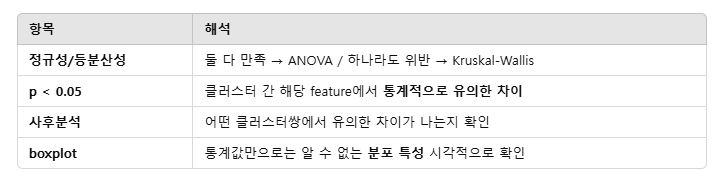

In [41]:
!pip install scikit-posthocs


üìä ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 598579.6663, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1    2              3              4              5
0   1.000000e+00  0.0  0.0  4.770657e-163   0.000000e+00   0.000000e+00
1   0.000000e+00  1.0  0.0   0.000000e+00   0.000000e+00   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00   0.000000e+00   0.000000e+00
3  4.770657e-163  0.0  0.0   1.000000e+00   0.000000e+00   0.000000e+00
4   0.000000e+00  0.0  0.0   0.000000e+00   1.000000e+00  4.371872e-212
5   0.000000e+00  0.0  0.0   0.000000e+00  4.371872e-212   1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True  

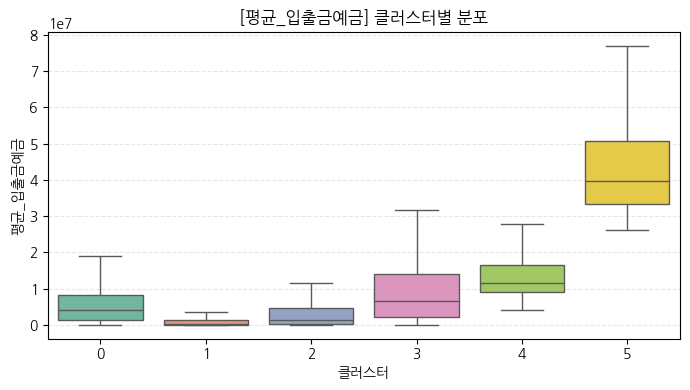


üìä ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 505409.2261, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0             1             2             3              4  \
0  1.000000e+00  0.000000e+00  0.000000e+00  8.728214e-83   0.000000e+00   
1  0.000000e+00  1.000000e+00  2.209564e-95  0.000000e+00   0.000000e+00   
2  0.000000e+00  2.209564e-95  1.000000e+00  0.000000e+00   0.000000e+00   
3  8.728214e-83  0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.709876e-288   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3   0.000000e+00  
4  2.709876e-288  
5   1.000000e+00  



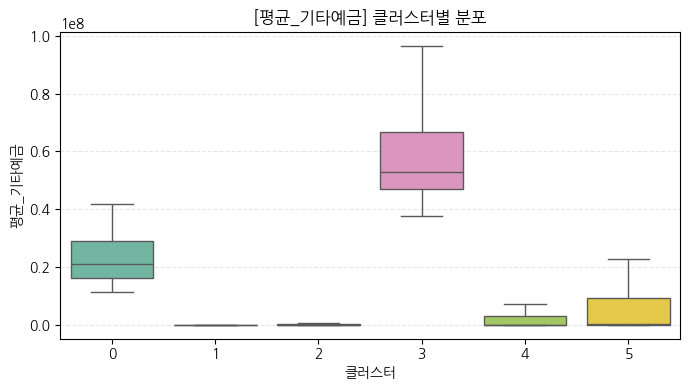


üìä ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 28606.0880, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1              2              3              4  \
0   1.000000e+00  0.0  3.434322e-240  1.570049e-149   1.285942e-81   
1   0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2  3.434322e-240  0.0   1.000000e+00   0.000000e+00   5.471491e-85   
3  1.570049e-149  0.0   0.000000e+00   1.000000e+00   0.000000e+00   
4   1.285942e-81  0.0   5.471491e-85   0.000000e+00   1.000000e+00   
5   3.929010e-63  0.0   0.000000e+00   1.539496e-09  1.110576e-202   

               5  
0   3.929010e-63  
1   0.000000e+00  
2   0.000000e+00  
3   1.539496e-09  
4  1.110576e-202  
5   1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 

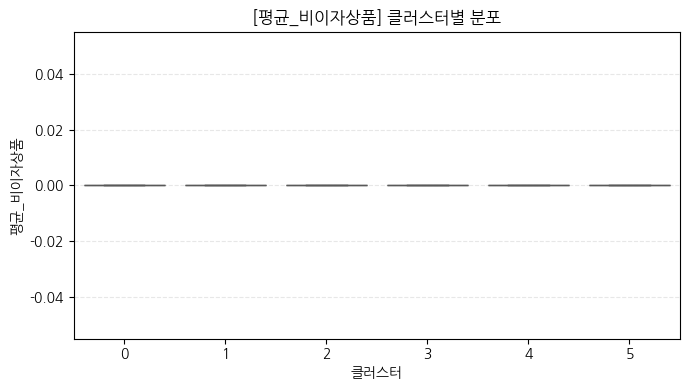


üìä ÌèâÍ∑†_Ïπ¥Îìú - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Ïπ¥Îìú - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 86794.1201, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1              2              3              4  \
0   1.000000e+00  0.0   2.442824e-01   4.861428e-30  3.517362e-294   
1   0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2   2.442824e-01  0.0   1.000000e+00   2.756915e-19  1.168217e-203   
3   4.861428e-30  0.0   2.756915e-19   1.000000e+00   7.614969e-38   
4  3.517362e-294  0.0  1.168217e-203   7.614969e-38   1.000000e+00   
5   0.000000e+00  0.0   0.000000e+00  1.103871e-160  6.329635e-105   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3  1.103871e-160  
4  6.329635e-105  
5   1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0   

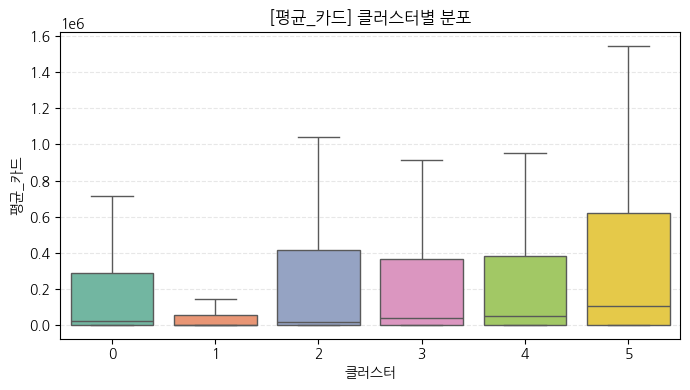


üìä ÌèâÍ∑†_ÎåÄÏ∂ú - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÎåÄÏ∂ú - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 355787.0266, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0              1    2              3              4  \
0   1.000000e+00   0.000000e+00  0.0   1.401858e-01  1.988327e-191   
1   0.000000e+00   1.000000e+00  0.0   0.000000e+00   0.000000e+00   
2   0.000000e+00   0.000000e+00  1.0   0.000000e+00   0.000000e+00   
3   1.401858e-01   0.000000e+00  0.0   1.000000e+00  1.960400e-119   
4  1.988327e-191   0.000000e+00  0.0  1.960400e-119   1.000000e+00   
5   2.064270e-76  2.775671e-149  0.0   5.604011e-70   1.000000e+00   

               5  
0   2.064270e-76  
1  2.775671e-149  
2   0.000000e+00  
3   5.604011e-70  
4   1.000000e+00  
5   1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0  

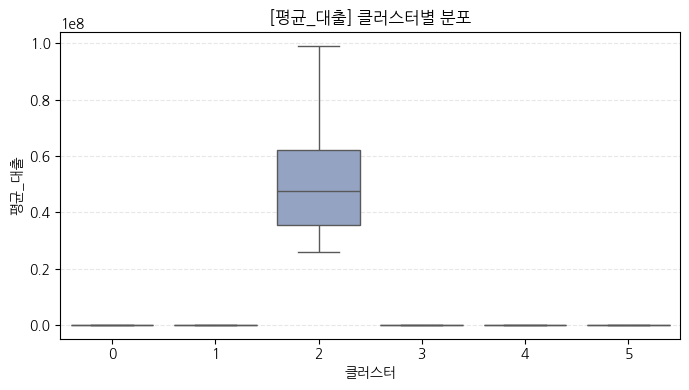


üìä ÌèâÍ∑†_Ï¥ùÏ†êÏàò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Ï¥ùÏ†êÏàò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 708132.7986, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0    1              2             3             4              5
0  1.000000e+00  0.0   0.000000e+00  0.000000e+00  4.656636e-09   0.000000e+00
1  0.000000e+00  1.0   0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
2  0.000000e+00  0.0   1.000000e+00  0.000000e+00  0.000000e+00  8.130324e-169
3  0.000000e+00  0.0   0.000000e+00  1.000000e+00  0.000000e+00   9.452349e-14
4  4.656636e-09  0.0   0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00
5  0.000000e+00  0.0  8.130324e-169  9.452349e-14  0.000000e+00   1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True  

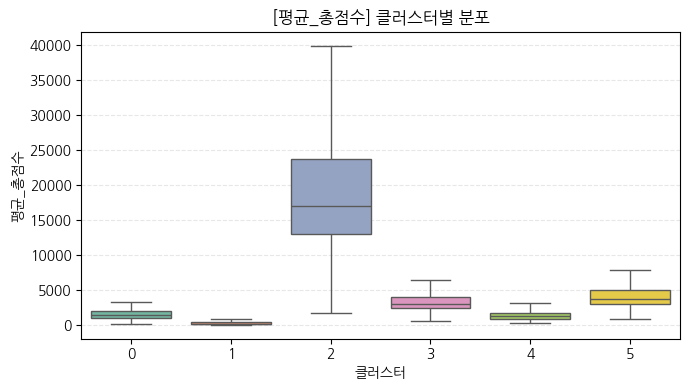


üìä Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî) - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî) - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 53032.3659, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0             1    2             3             4             5
0  1.000000e+00  0.000000e+00  0.0  0.000000e+00  7.231490e-46  0.000000e+00
1  0.000000e+00  1.000000e+00  0.0  0.000000e+00  0.000000e+00  4.248673e-52
2  0.000000e+00  0.000000e+00  1.0  0.000000e+00  0.000000e+00  0.000000e+00
3  0.000000e+00  0.000000e+00  0.0  1.000000e+00  0.000000e+00  8.951044e-73
4  7.231490e-46  0.000000e+00  0.0  0.000000e+00  1.000000e+00  0.000000e+00
5  0.000000e+00  4.248673e-52  0.0  8.951044e-73  0.000000e+00  1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True  

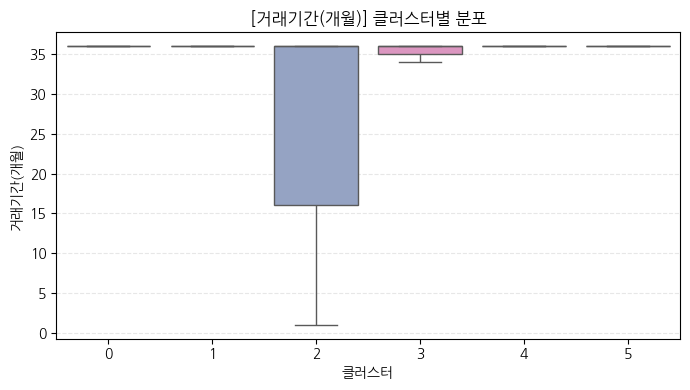


üìä Ïó∞Î†πÎåÄ - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä Ïó∞Î†πÎåÄ - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 95888.2364, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1    2              3             4              5
0   1.000000e+00  0.0  0.0  1.481702e-173  1.181886e-28   1.232611e-03
1   0.000000e+00  1.0  0.0   0.000000e+00  0.000000e+00   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00  0.000000e+00   0.000000e+00
3  1.481702e-173  0.0  0.0   1.000000e+00  0.000000e+00  7.967685e-145
4   1.181886e-28  0.0  0.0   0.000000e+00  1.000000e+00   2.363663e-02
5   1.232611e-03  0.0  0.0  7.967685e-145  2.363663e-02   1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   Tru

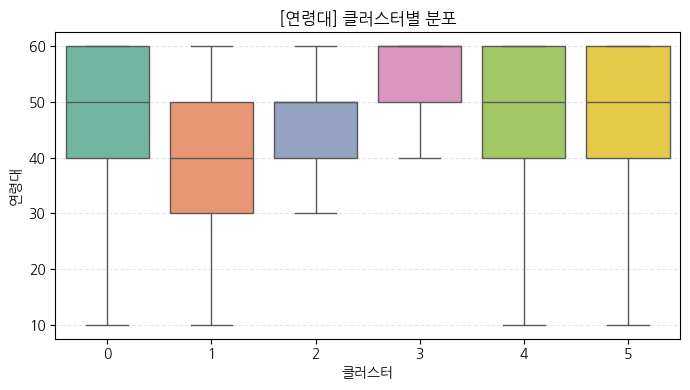


üìä ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 279709.0418, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0    1             2             3              4              5
0  1.000000e+00  0.0  0.000000e+00  1.054622e-12   0.000000e+00   0.000000e+00
1  0.000000e+00  1.0  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00
2  0.000000e+00  0.0  1.000000e+00  0.000000e+00   0.000000e+00   4.226284e-50
3  1.054622e-12  0.0  0.000000e+00  1.000000e+00   0.000000e+00   0.000000e+00
4  0.000000e+00  0.0  0.000000e+00  0.000000e+00   1.000000e+00  2.673169e-152
5  0.000000e+00  0.0  4.226284e-50  0.000000e+00  2.673169e-152   1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   Tr

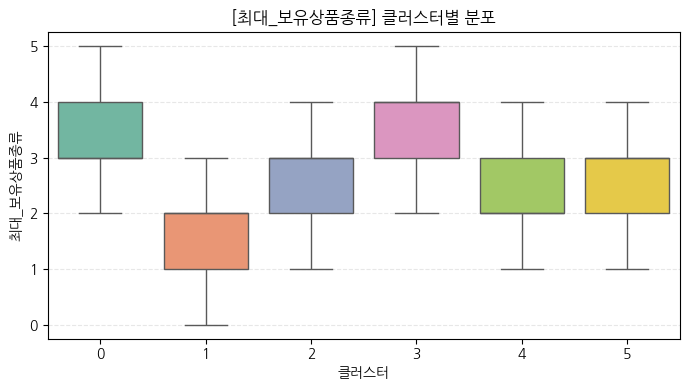


üìä ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 334019.1311, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1             2              3              4  \
0   1.000000e+00  0.0  0.000000e+00  2.524738e-230   0.000000e+00   
1   0.000000e+00  1.0  0.000000e+00   0.000000e+00   0.000000e+00   
2   0.000000e+00  0.0  1.000000e+00   0.000000e+00   0.000000e+00   
3  2.524738e-230  0.0  0.000000e+00   1.000000e+00   0.000000e+00   
4   0.000000e+00  0.0  0.000000e+00   0.000000e+00   1.000000e+00   
5   0.000000e+00  0.0  2.925366e-81   0.000000e+00  1.326637e-179   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   2.925366e-81  
3   0.000000e+00  
4  1.326637e-179  
5   1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 

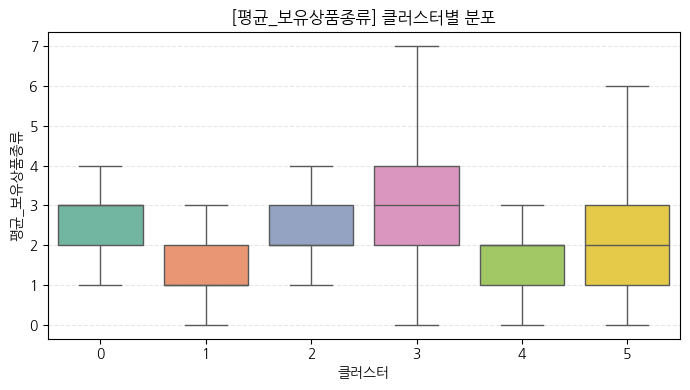

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

# Î∂ÑÏÑù ÎåÄÏÉÅ DataFrame
df = customer_agg_kmeans_db_Í±∞Î¶¨_6.to_pandas()

# Î≥ÄÏàò Î¶¨Ïä§Ìä∏
features = [
    "ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à", "ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à", "ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà", 
    "ÌèâÍ∑†_Ïπ¥Îìú", "ÌèâÍ∑†_ÎåÄÏ∂ú", "ÌèâÍ∑†_Ï¥ùÏ†êÏàò", "Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)",
    "Ïó∞Î†πÎåÄ", "ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò", "ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"
]

cluster_col = "KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò"

# ‚úÖ Î∂ÑÏÑù Î∞òÎ≥µ
for feature in features:
    print("\n" + "=" * 70)
    print(f"üìä {feature} - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù")
    print("=" * 70)

    # ------------------------------
    # ‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∑∏Î£π Îç∞Ïù¥ÌÑ∞
    group_values = [group[feature].dropna().values for name, group in df.groupby(cluster_col)]

    # ‚úÖ Ï†ïÍ∑úÏÑ± + Îì±Î∂ÑÏÇ∞ÏÑ± Ï≤¥ÌÅ¨
    normal = all(shapiro(g)[1] > 0.05 for g in group_values)
    equal_var = levene(*group_values)[1] > 0.05

    print(f"üîé Ï†ïÍ∑úÏÑ±: {'‚úÖ Ï∂©Ï°±' if normal else '‚ùå X'} | Îì±Î∂ÑÏÇ∞ÏÑ±: {'‚úÖ Ï∂©Ï°±' if equal_var else '‚ùå X'}")

    # ------------------------------
    # ‚úÖ Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
    if normal and equal_var:
        stat, p = f_oneway(*group_values)
        test_name = "ANOVA"
    else:
        stat, p = kruskal(*group_values)
        test_name = "Kruskal-Wallis"

    print(f"\nüìä {feature} - {test_name} Í≤∞Í≥º")
    print(f"‚Üí ÌÜµÍ≥ÑÎüâ: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")

        # ‚úÖ ÏÇ¨ÌõÑÎ∂ÑÏÑù
        if test_name == "ANOVA":
            print("\nüîç ÏÇ¨ÌõÑÎ∂ÑÏÑù (Tukey HSD):")
            tukey_result = pairwise_tukeyhsd(endog=df[feature], groups=df[cluster_col], alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
            tukey_df["Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥"] = tukey_df["p-adj"] < 0.05  # True/False Ï∂îÍ∞Ä
            print(tukey_df)
        else:
            print("\nüìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):")
            dunn_result = sp.posthoc_dunn(df, val_col=feature, group_col=cluster_col, p_adjust='bonferroni')
            dunn_bool = dunn_result < 0.05  # True/False Ï∂îÍ∞Ä
            print("üîπ p-value Matrix:")
            print(dunn_result)
            print("\nüîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):")
            print(dunn_bool)

    else:
        print("‚ö†Ô∏è ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.")

    print("-" * 70)

    # ------------------------------
    # ‚úÖ Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=cluster_col, y=feature, palette="Set2", showfliers=False)
    plt.title(f"[{feature}] ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Î∂ÑÌè¨")
    plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ 2030 boxplot

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

In [44]:
# ‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ: 2030ÏÑ∏ÎåÄ ÌïÑÌÑ∞ÎßÅ
df = customer_agg_kmeans_db_Í±∞Î¶¨_6.to_pandas()
df_2030 = df[(df["Ïó∞Î†πÎåÄ"] >= 20) & (df["Ïó∞Î†πÎåÄ"] < 40)].copy()

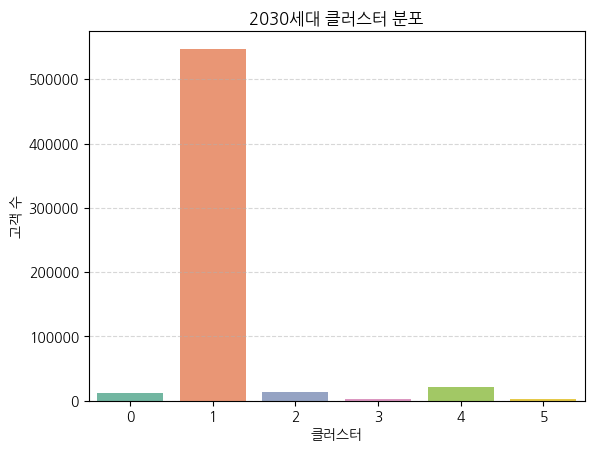

In [46]:
# 2030ÏÑ∏ÎåÄÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï∞®Ïù¥ Î∂ÑÏÑù
# 2030 ÌïÑÌÑ∞ÎßÅ (20~39ÏÑ∏)
df = customer_agg_kmeans_db_Í±∞Î¶¨_6.to_pandas()
df_2030 = df[(df["Ïó∞Î†πÎåÄ"] >= 20) & (df["Ïó∞Î†πÎåÄ"] < 40)]

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Î∂ÑÌè¨ ÌôïÏù∏
sns.countplot(data=df_2030, x="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", palette="Set2")
plt.title("2030ÏÑ∏ÎåÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 83241.3896, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
          0             1             2              3              4  \
0  1.000000  0.000000e+00  0.000000e+00   6.362658e-05   0.000000e+00   
1  0.000000  1.000000e+00  5.429610e-79   0.000000e+00   0.000000e+00   
2  0.000000  5.429610e-79  1.000000e+00   0.000000e+00   0.000000e+00   
3  0.000064  0.000000e+00  0.000000e+00   1.000000e+00  4.163909e-212   
4  0.000000  0.000000e+00  0.000000e+00  4.163909e-212   1.000000e+00   
5  0.000000  0.000000e+00  0.000000e+00  5.711052e-159   5.828630e-04   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3  5.711052e-159  
4   5.828630e-04  
5   1.000000e+00  

üî

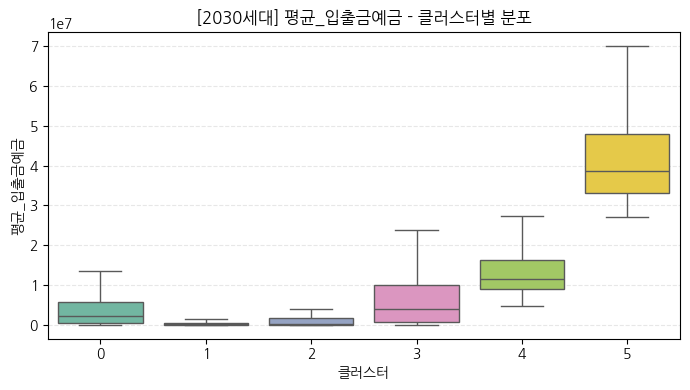


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 75030.4304, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
          0             1             2         3             4             5
0  1.000000  0.000000e+00  0.000000e+00  0.118822  0.000000e+00  0.000000e+00
1  0.000000  1.000000e+00  5.240986e-62  0.000000  0.000000e+00  0.000000e+00
2  0.000000  5.240986e-62  1.000000e+00  0.000000  0.000000e+00  0.000000e+00
3  0.118822  0.000000e+00  0.000000e+00  1.000000  0.000000e+00  0.000000e+00
4  0.000000  0.000000e+00  0.000000e+00  0.000000  1.000000e+00  4.996455e-21
5  0.000000  0.000000e+00  0.000000e+00  0.000000  4.996455e-21  1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   Tr

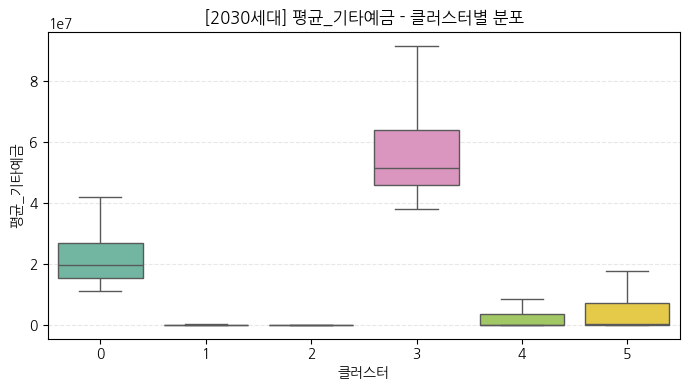


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 4352.5595, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0              1              2              3              4  \
0   1.000000e+00   0.000000e+00  1.190870e-165   1.703465e-53   2.699556e-63   
1   0.000000e+00   1.000000e+00   9.932530e-10  4.806819e-309  5.370034e-189   
2  1.190870e-165   9.932530e-10   1.000000e+00  1.562011e-220   6.824675e-41   
3   1.703465e-53  4.806819e-309  1.562011e-220   1.000000e+00  8.278392e-142   
4   2.699556e-63  5.370034e-189   6.824675e-41  8.278392e-142   1.000000e+00   
5   4.591401e-05   9.277903e-59   3.079360e-32   2.775580e-56   1.944685e-05   

              5  
0  4.591401e-05  
1  9.277903e-59  
2  3.079360e-32  
3  2.775580e-56  

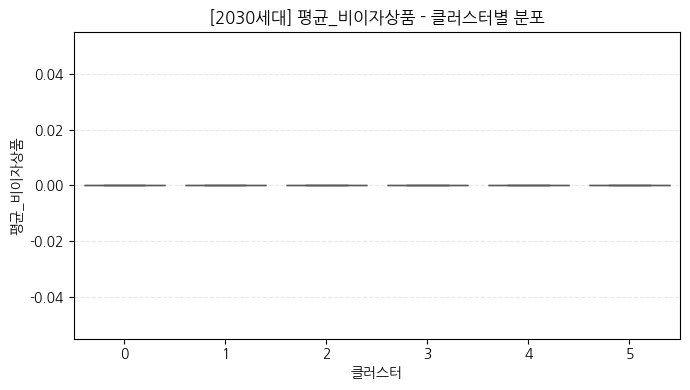


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_Ïπ¥Îìú - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Ïπ¥Îìú - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 17377.7121, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0              1              2              3             4  \
0  1.000000e+00   0.000000e+00   0.000000e+00   1.418081e-01  1.629683e-22   
1  0.000000e+00   1.000000e+00   1.000000e+00  6.756490e-258  0.000000e+00   
2  0.000000e+00   1.000000e+00   1.000000e+00  1.523067e-220  0.000000e+00   
3  1.418081e-01  6.756490e-258  1.523067e-220   1.000000e+00  7.205148e-02   
4  1.629683e-22   0.000000e+00   0.000000e+00   7.205148e-02  1.000000e+00   
5  1.890535e-11   0.000000e+00  1.363880e-305   1.091678e-02  1.000000e+00   

               5  
0   1.890535e-11  
1   0.000000e+00  
2  1.363880e-305  
3   1.091678e-02  
4   1.000000e+00  
5   1.

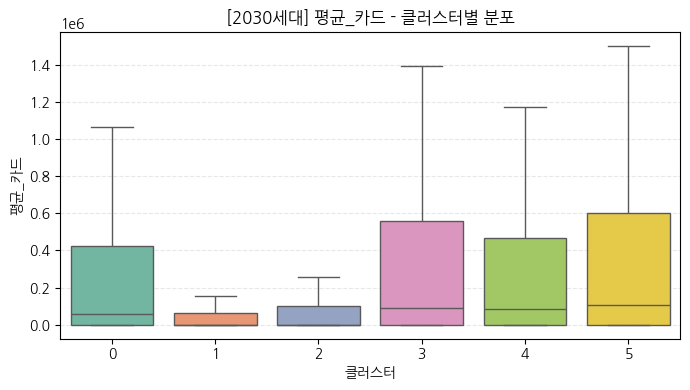


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_ÎåÄÏ∂ú - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_ÎåÄÏ∂ú - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 64095.1194, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0              1    2              3             4             5
0  1.000000e+00   0.000000e+00  0.0   1.000000e+00  1.254174e-20  7.310055e-04
1  0.000000e+00   1.000000e+00  0.0  7.980182e-122  0.000000e+00  2.191130e-93
2  0.000000e+00   0.000000e+00  1.0   0.000000e+00  0.000000e+00  0.000000e+00
3  1.000000e+00  7.980182e-122  0.0   1.000000e+00  1.718462e-05  7.569207e-02
4  1.254174e-20   0.000000e+00  0.0   1.718462e-05  1.000000e+00  1.000000e+00
5  7.310055e-04   2.191130e-93  0.0   7.569207e-02  1.000000e+00  1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  F

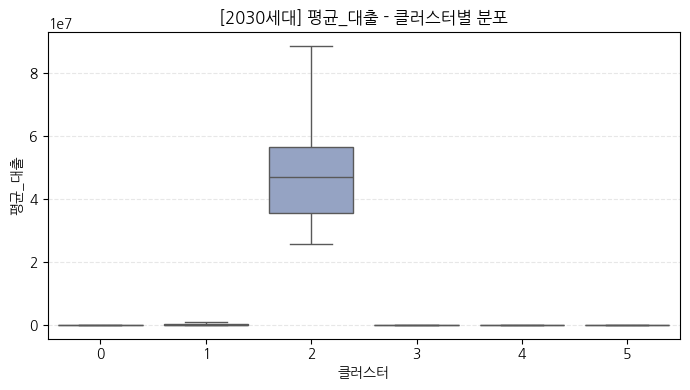


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_Ï¥ùÏ†êÏàò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Ï¥ùÏ†êÏàò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 114912.1143, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1              2             3              4  \
0   1.000000e+00  0.0  3.354001e-237  1.259086e-21   1.000000e+00   
1   0.000000e+00  1.0   0.000000e+00  0.000000e+00   0.000000e+00   
2  3.354001e-237  0.0   1.000000e+00  6.661851e-20  2.022164e-270   
3   1.259086e-21  0.0   6.661851e-20  1.000000e+00   4.313244e-19   
4   1.000000e+00  0.0  2.022164e-270  4.313244e-19   1.000000e+00   
5   2.485782e-35  0.0   2.942187e-12  9.565745e-01   1.324820e-32   

              5  
0  2.485782e-35  
1  0.000000e+00  
2  2.942187e-12  
3  9.565745e-01  
4  1.324820e-32  
5  1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
     

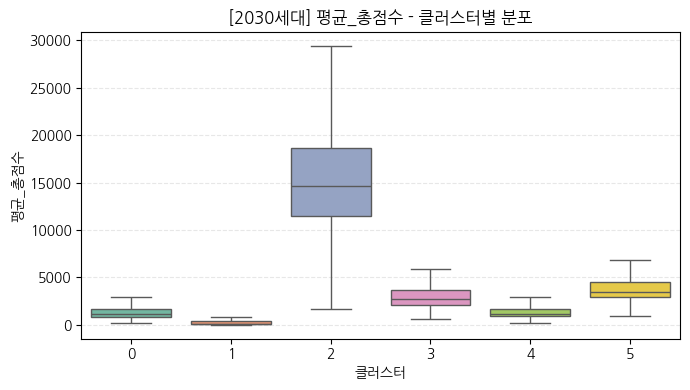


üìä [2030ÏÑ∏ÎåÄ] Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî) - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî) - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 17484.8381, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0             1    2              3              4             5
0  1.000000e+00  0.000000e+00  0.0   4.575709e-86   1.330107e-04  9.738809e-11
1  0.000000e+00  1.000000e+00  0.0   2.540894e-01   0.000000e+00  1.638167e-35
2  0.000000e+00  0.000000e+00  1.0   0.000000e+00   0.000000e+00  0.000000e+00
3  4.575709e-86  2.540894e-01  0.0   1.000000e+00  1.353553e-115  1.376501e-24
4  1.330107e-04  0.000000e+00  0.0  1.353553e-115   1.000000e+00  5.310382e-21
5  9.738809e-11  1.638167e-35  0.0   1.376501e-24   5.310382e-21  1.000000e+00

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):
       0      1      2      3      4      5
0  False   

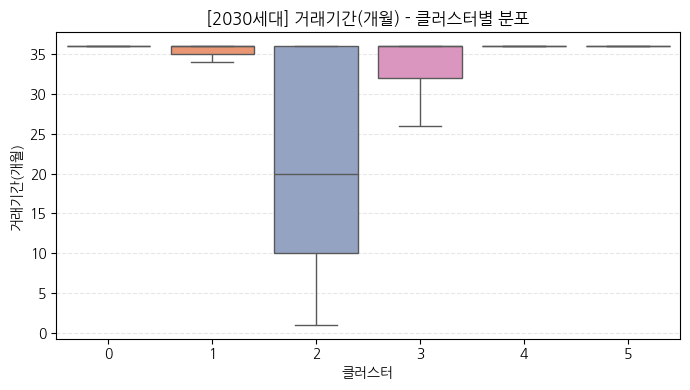


üìä [2030ÏÑ∏ÎåÄ] ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 37764.8293, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
               0    1             2              3              4  \
0   1.000000e+00  0.0  0.000000e+00   1.000000e+00   0.000000e+00   
1   0.000000e+00  1.0  0.000000e+00   0.000000e+00   0.000000e+00   
2   0.000000e+00  0.0  1.000000e+00   0.000000e+00   9.723117e-90   
3   1.000000e+00  0.0  0.000000e+00   1.000000e+00  1.503355e-233   
4   0.000000e+00  0.0  9.723117e-90  1.503355e-233   1.000000e+00   
5  4.486308e-179  0.0  1.137610e-52  3.940978e-103   5.047950e-05   

               5  
0  4.486308e-179  
1   0.000000e+00  
2   1.137610e-52  
3  3.940978e-103  
4   5.047950e-05  
5   1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ 

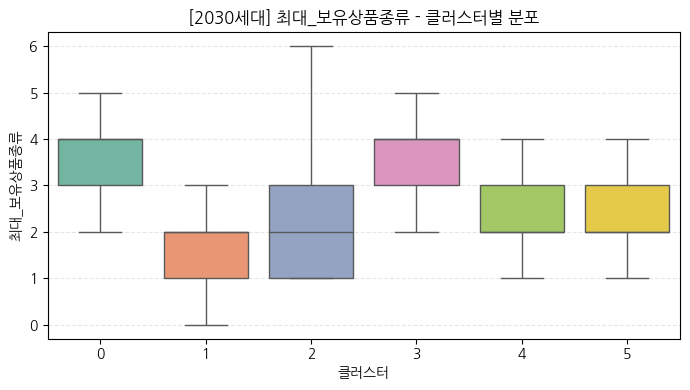


üìä [2030ÏÑ∏ÎåÄ] ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù
üîé Ï†ïÍ∑úÏÑ±: ‚ùå X | Îì±Î∂ÑÏÇ∞ÏÑ±: ‚ùå X

üìä ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò - Kruskal-Wallis Í≤∞Í≥º
‚Üí ÌÜµÍ≥ÑÎüâ: 50923.1698, p-value: 0.0000
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.

üìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):
üîπ p-value Matrix:
              0    1              2              3              4  \
0  1.000000e+00  0.0   0.000000e+00   2.027821e-12   0.000000e+00   
1  0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2  0.000000e+00  0.0   1.000000e+00  2.159436e-234   4.129794e-20   
3  2.027821e-12  0.0  2.159436e-234   1.000000e+00  6.975135e-180   
4  0.000000e+00  0.0   4.129794e-20  6.975135e-180   1.000000e+00   
5  5.285715e-56  0.0   1.539320e-23   3.528900e-72   1.690138e-06   

              5  
0  5.285715e-56  
1  0.000000e+00  
2  1.539320e-23  
3  3.528900e-72  
4  1.690138e-06  
5  1.000000e+00  

üîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä 

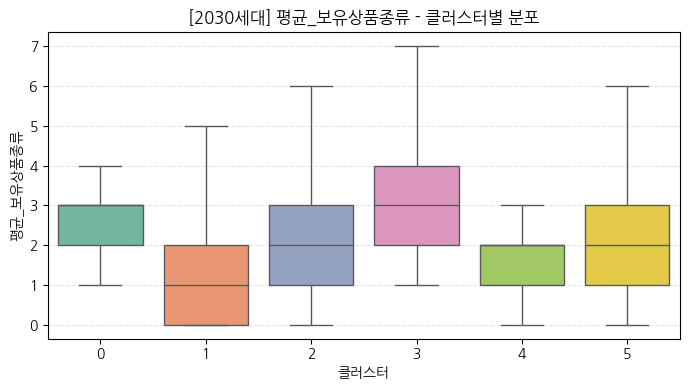

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

# ‚úÖ Î≥ÄÏàò Î¶¨Ïä§Ìä∏
features = [
    "ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à", "ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à", "ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà", 
    "ÌèâÍ∑†_Ïπ¥Îìú", "ÌèâÍ∑†_ÎåÄÏ∂ú", "ÌèâÍ∑†_Ï¥ùÏ†êÏàò", "Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)",
    "ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò", "ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"
]

cluster_col = "KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò"

# ‚úÖ Î∂ÑÏÑù Î∞òÎ≥µ
for feature in features:
    print("\n" + "=" * 70)
    print(f"üìä [2030ÏÑ∏ÎåÄ] {feature} - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïú†ÏùòÏÑ± Î∂ÑÏÑù")
    print("=" * 70)

    # ------------------------------
    # ‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∑∏Î£π Îç∞Ïù¥ÌÑ∞
    group_values = [group[feature].dropna().values for name, group in df_2030.groupby(cluster_col)]

    # ‚úÖ Ï†ïÍ∑úÏÑ± + Îì±Î∂ÑÏÇ∞ÏÑ± Ï≤¥ÌÅ¨
    normal = all(shapiro(g)[1] > 0.05 for g in group_values)
    equal_var = levene(*group_values)[1] > 0.05

    print(f"üîé Ï†ïÍ∑úÏÑ±: {'‚úÖ Ï∂©Ï°±' if normal else '‚ùå X'} | Îì±Î∂ÑÏÇ∞ÏÑ±: {'‚úÖ Ï∂©Ï°±' if equal_var else '‚ùå X'}")

    # ------------------------------
    # ‚úÖ Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
    if normal and equal_var:
        stat, p = f_oneway(*group_values)
        test_name = "ANOVA"
    else:
        stat, p = kruskal(*group_values)
        test_name = "Kruskal-Wallis"

    print(f"\nüìä {feature} - {test_name} Í≤∞Í≥º")
    print(f"‚Üí ÌÜµÍ≥ÑÎüâ: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")

        # ‚úÖ ÏÇ¨ÌõÑÎ∂ÑÏÑù
        if test_name == "ANOVA":
            print("\nüîç ÏÇ¨ÌõÑÎ∂ÑÏÑù (Tukey HSD):")
            tukey_result = pairwise_tukeyhsd(endog=df_2030[feature], groups=df_2030[cluster_col], alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
            tukey_df["Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥"] = tukey_df["p-adj"] < 0.05  # True/False Ï∂îÍ∞Ä
            print(tukey_df)
        else:
            print("\nüìä ÏÇ¨ÌõÑÎ∂ÑÏÑù (Dunn‚Äôs Test, Bonferroni Ï°∞Ï†ï):")
            dunn_result = sp.posthoc_dunn(df_2030, val_col=feature, group_col=cluster_col, p_adjust='bonferroni')
            dunn_bool = dunn_result < 0.05  # True/False Ï∂îÍ∞Ä
            print("üîπ p-value Matrix:")
            print(dunn_result)
            print("\nüîπ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ Ïó¨Î∂Ä (p < 0.05):")
            print(dunn_bool)

    else:
        print("‚ö†Ô∏è ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.")

    print("-" * 70)

    # ------------------------------
    # ‚úÖ Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df_2030, x=cluster_col, y=feature, palette="Set2", showfliers=False)
    plt.title(f"[2030ÏÑ∏ÎåÄ] {feature} - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Î∂ÑÌè¨")
    plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎÇ¥ 2030 ÎπÑÏú® Îì±..

In [50]:
summary_df_2030 = df_2030.groupby("Ïó∞Î†πÎåÄ").agg({
    "Í≥†Í∞ùID": "count",  # Í≥†Í∞ù Ïàò (Í≥†Í∞ùIDÎ•º countÎ°ú ÎåÄÏ≤¥)
    "ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à": "mean",
    "ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à": "mean",
    "ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà": "mean",
    "ÌèâÍ∑†_Ïπ¥Îìú": "mean",
    "ÌèâÍ∑†_ÎåÄÏ∂ú": "mean",
    "ÌèâÍ∑†_Ï¥ùÏ†êÏàò": "mean",
    "Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)": "mean",
    "ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò": "mean",
    "ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò": "mean"
}).rename(columns={"Í≥†Í∞ùID": "Í≥†Í∞ùÏàò"}).reset_index()  # üîπ Ïù∏Îç±Ïä§Î•º Ìï¥Ï†úÌïòÏó¨ 'Ïó∞Î†πÎåÄ'Î•º Ïª¨ÎüºÏúºÎ°ú Î≥µÍµ¨

# Ïó∞Î†πÎåÄÏôÄ ÌèâÍ∑† Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•òÎ•º Î∞òÏò¨Î¶º Î∞è Ï†ïÏàòÌòï Î≥ÄÌôò
summary_df_2030["Ïó∞Î†πÎåÄ"] = summary_df_2030["Ïó∞Î†πÎåÄ"].round(0).astype("int8")
summary_df_2030["ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"] = summary_df_2030["ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"].round(0).astype("int8")

In [51]:
summary_df_2030

Ïó∞Î†πÎåÄ     Í≥†Í∞ùÏàò      ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à       ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à      ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà          ÌèâÍ∑†_Ïπ¥Îìú  \
0   20  298266  8.788421e+05  1.097136e+06  57761.325796  103915.923926   
1   30  301233  1.887208e+06  1.577643e+06  73591.945692  133046.244737   

          ÌèâÍ∑†_ÎåÄÏ∂ú       ÌèâÍ∑†_Ï¥ùÏ†êÏàò   Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)  ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò  ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò  
0  1.069662e+06   497.900145  30.240959   1.851978          1  
1  3.123793e+06  1315.325047  31.100650   1.862253          1

shape: (6, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò ‚îÜ Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò ‚îÜ 2030_Í≥†Í∞ùÏàò ‚îÜ 2030_ÎπÑÏú®(%) ‚îÇ
‚îÇ ---                ‚îÜ ---         ‚îÜ ---         ‚îÜ ---          ‚îÇ
‚îÇ i64                ‚îÜ u32         ‚îÜ u32         ‚îÜ f64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 5                  ‚îÜ 26586       ‚îÜ 2897        ‚îÜ 10.9         ‚îÇ
‚îÇ 4                  ‚îÜ 156487      ‚îÜ 20723       ‚îÜ 13.24        ‚îÇ
‚îÇ 0                  ‚îÜ 82990       ‚îÜ 12443       ‚îÜ 14.99        ‚îÇ
‚îÇ 1                  ‚îÜ 1619255     ‚îÜ 547467      ‚îÜ 33.81        ‚îÇ
‚îÇ 2                  ‚îÜ 61942       ‚îÜ 13324

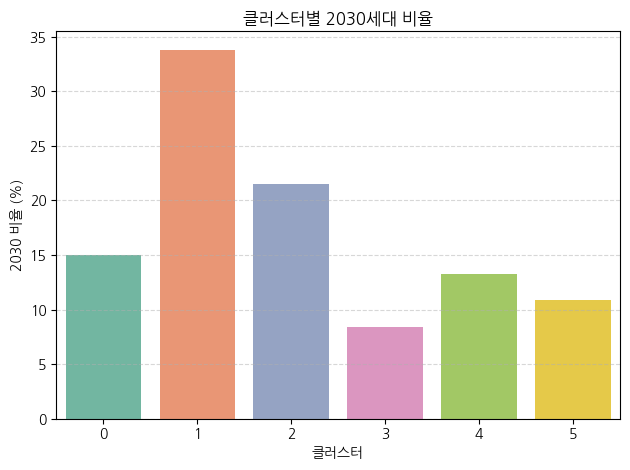

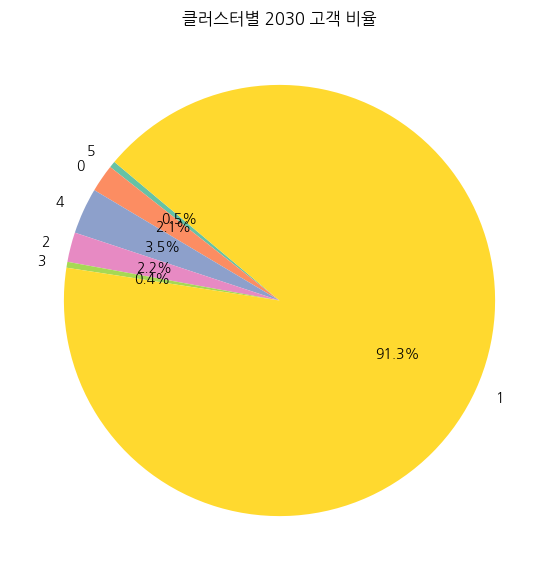

<Figure size 800x500 with 0 Axes>

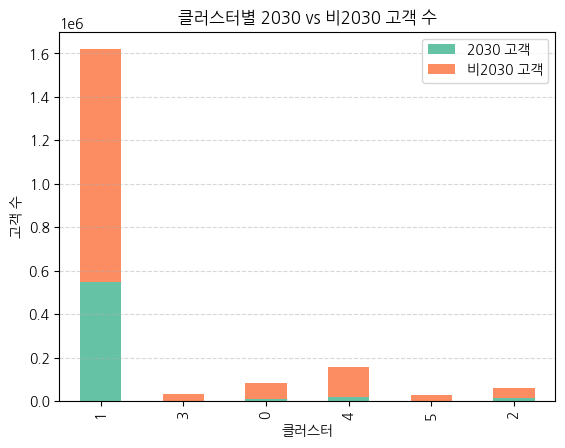

<Figure size 800x500 with 0 Axes>

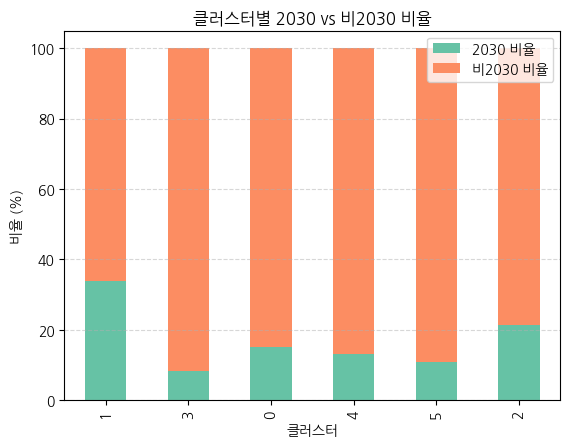

In [55]:
# 2030ÏÑ∏ÎåÄ Ïó¨Î∂Ä ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä
df_2030 = customer_agg_kmeans_db_Í±∞Î¶¨_6.with_columns(
    ((pl.col("Ïó∞Î†πÎåÄ") >= 20) & (pl.col("Ïó∞Î†πÎåÄ") < 40)).alias("is_2030")
)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030 ÎπÑÏú® Í≥ÑÏÇ∞
cluster_2030 = df_2030.group_by("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò").agg([
    pl.count().alias("Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò"),
    pl.col("is_2030").sum().alias("2030_Í≥†Í∞ùÏàò")
]).with_columns(
    (pl.col("2030_Í≥†Í∞ùÏàò") / pl.col("Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò") * 100).round(2).alias("2030_ÎπÑÏú®(%)")
)

print(cluster_2030)

# ÏãúÍ∞ÅÌôî
sns.barplot(
    data=cluster_2030.to_pandas(),
    x="KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò", y="2030_ÎπÑÏú®(%)", palette="Set2"
)
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030ÏÑ∏ÎåÄ ÎπÑÏú®")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("2030 ÎπÑÏú® (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2030 Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
df_2030_only = df_2030.filter(pl.col("is_2030"))

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030 Í≥†Í∞ù Ïàò
cluster_2030_pie = df_2030_only.group_by("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò").agg(
    pl.count().alias("2030_Í≥†Í∞ùÏàò")
).to_pandas()

# ÏõêÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(7, 7))
plt.pie(cluster_2030_pie["2030_Í≥†Í∞ùÏàò"], 
        labels=cluster_2030_pie["KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò"], 
        autopct="%1.1f%%", colors=sns.color_palette("Set2"),
        startangle=140)
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030 Í≥†Í∞ù ÎπÑÏú®")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Ï†ÑÏ≤¥ Í≥†Í∞ùÏàò Î∞è 2030 Í≥†Í∞ùÏàò Í≥ÑÏÇ∞
cluster_2030 = df_2030.group_by("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò").agg([
    pl.count().alias("Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò"),
    pl.col("is_2030").sum().alias("2030_Í≥†Í∞ùÏàò")
])

# ÎπÑ2030 Í≥†Í∞ùÏàò Í≥ÑÏÇ∞
cluster_2030 = cluster_2030.with_columns(
    (pl.col("Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò") - pl.col("2030_Í≥†Í∞ùÏàò")).alias("ÎπÑ2030_Í≥†Í∞ùÏàò")
).to_pandas()

# ÏãúÍ∞ÅÌôî (ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(8, 5))
cluster_2030.set_index("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò")[["2030_Í≥†Í∞ùÏàò", "ÎπÑ2030_Í≥†Í∞ùÏàò"]].plot(
    kind="bar", stacked=True, color=["#66c2a5", "#fc8d62"]
)
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030 vs ÎπÑ2030 Í≥†Í∞ù Ïàò")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.legend(["2030 Í≥†Í∞ù", "ÎπÑ2030 Í≥†Í∞ù"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 2030 ÎπÑÏú® Í≥ÑÏÇ∞
cluster_2030 = cluster_2030.assign(
    ÎπÑ2030_ÎπÑÏú®=(cluster_2030["ÎπÑ2030_Í≥†Í∞ùÏàò"] / cluster_2030["Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò"]) * 100,
    ÎπÑÏú®_2030=(cluster_2030["2030_Í≥†Í∞ùÏàò"] / cluster_2030["Ï†ÑÏ≤¥_Í≥†Í∞ùÏàò"]) * 100 
)

# ÏãúÍ∞ÅÌôî (ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(8, 5))
cluster_2030.set_index("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò")[["ÎπÑÏú®_2030", "ÎπÑ2030_ÎπÑÏú®"]].plot(
    kind="bar", stacked=True, color=["#66c2a5", "#fc8d62"]
)
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 2030 vs ÎπÑ2030 ÎπÑÏú®")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.ylabel("ÎπÑÏú® (%)")
plt.legend(["2030 ÎπÑÏú®", "ÎπÑ2030 ÎπÑÏú®"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [56]:
customer_agg_kmeans_db_Í±∞Î¶¨_6.columns

['Í≥†Í∞ùID',
 'ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à',
 'ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à',
 'ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà',
 'ÌèâÍ∑†_Ïπ¥Îìú',
 'ÌèâÍ∑†_ÎåÄÏ∂ú',
 'ÌèâÍ∑†_Ï¥ùÏ†êÏàò',
 'Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)',
 'Ïó∞Î†πÎåÄ',
 'ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò',
 'ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò',
 'KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò']

In [57]:
import scipy.stats as stats

# Î∂ÑÏÑù Î≥ÄÏàò Î™©Î°ù
variables = ["ÌèâÍ∑†_ÏûÖÏ∂úÍ∏àÏòàÍ∏à", "ÌèâÍ∑†_Í∏∞ÌÉÄÏòàÍ∏à", "ÌèâÍ∑†_ÎπÑÏù¥ÏûêÏÉÅÌíà", "ÌèâÍ∑†_ÎåÄÏ∂ú", "ÌèâÍ∑†_Ïπ¥Îìú", "ÌèâÍ∑†_Ï¥ùÏ†êÏàò", "Í±∞ÎûòÍ∏∞Í∞Ñ(Í∞úÏõî)", "Ïó∞Î†πÎåÄ", "ÏµúÎåÄ_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò", "ÌèâÍ∑†_Î≥¥Ïú†ÏÉÅÌíàÏ¢ÖÎ•ò"]

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î¶¨Ïä§Ìä∏
clusters = sorted(customer_agg_kmeans_db_Í±∞Î¶¨_6["KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò"].unique())

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌï¥ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
for c in clusters:
    df_c = customer_agg_kmeans_db_Í±∞Î¶¨_6.filter(pl.col("KMeans_DB_Í±∞Î¶¨Í∏∞Î∞ò") == c).to_pandas()
    print(f"\nüîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ {c} ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
    corr = df_c[variables].corr(method="pearson")
    display(corr.style.background_gradient(cmap='Pastel1').format(precision=2))



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÏÉÅÍ¥ÄÍ≥ÑÏàò:



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÉÅÍ¥ÄÍ≥ÑÏàò:



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 ÏÉÅÍ¥ÄÍ≥ÑÏàò:



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 ÏÉÅÍ¥ÄÍ≥ÑÏàò:



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 ÏÉÅÍ¥ÄÍ≥ÑÏàò:



üîπ ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 ÏÉÅÍ¥ÄÍ≥ÑÏàò:
